# 4. Building machine learning model and prediction using the trained model

In [2]:
import pandas as pd

In [3]:
df_train=pd.read_csv("new_titanic_train.csv")
df_test=pd.read_csv("new_titanic_test.csv")

In [13]:
df_train.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Initial
0,0,0,3,1,22.0,7.2500,2,2,3
1,1,1,1,0,38.0,71.2833,0,2,2
2,2,1,3,0,26.0,7.9250,2,1,1
3,3,1,1,0,35.0,53.1000,2,2,2
4,4,0,3,1,35.0,8.0500,2,1,3


In [4]:
x=df_train.loc[:,"Pclass":]
y=df_train.Survived

In [5]:
#데이터 나누기
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=0)

In [6]:
#모델 만들기
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
#모델 학습시키기
model.fit(x_train,y_train)
#모델 예측하기 for x_val
pred=model.predict(x_val)

C:\Python\py\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
y_val.shape

(268,)

In [25]:
from sklearn import metrics

print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_val.shape[0], 
                                           100 * metrics.accuracy_score(pred, y_val)))

총 268명 중 80.97% 정확도로 생존을 맞춤


In [0]:
#생존에 가장 큰 영향을 준 데이터 셋 구하기

#학습된 모델은 feature importance 를 가지게 되는데, 우리는 이것을 확인하여 
#지금 만든 모델이 어떤 feature 에 영향을 많이 받았는 지 확인할 수 있습니다.

In [7]:
test=df_test.loc[:,"Pclass":]

In [0]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test.columns)

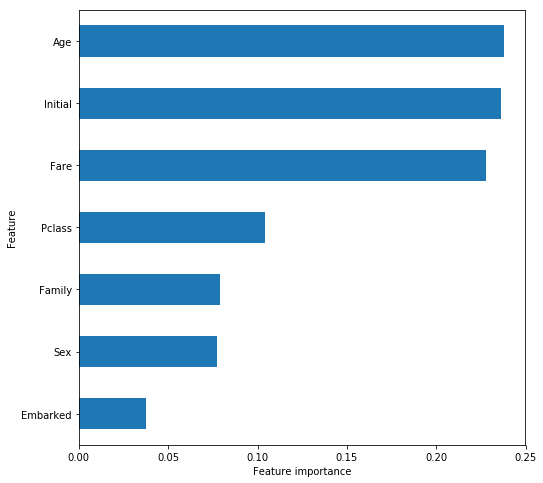

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [0]:
## Prediction on Test set

In [9]:
submission = pd.read_csv('./titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [53]:
df_test.head()

,Unnamed: 0,Pclass,Sex,Age,Fare,Embarked,Family,Initial
0,0,3,1,34.5,7.8292,1,1,3.0
1,1,3,0,47.0,7.0000,2,2,2.0
2,2,2,1,62.0,9.6875,1,1,3.0
3,3,3,1,27.0,8.6625,2,1,3.0
4,4,3,0,22.0,12.2875,2,3,2.0


In [10]:
test=df_test.loc[:,"Pclass":]
x_test=test.values
x_test


array([[ 3. ,  1. , 34.5, ...,  1. ,  1. ,  3. ],
       [ 3. ,  0. , 47. , ...,  2. ,  2. ,  2. ],
       [ 2. ,  1. , 62. , ...,  1. ,  1. ,  3. ],
       ...,
       [ 3. ,  1. , 38.5, ...,  2. ,  1. ,  3. ],
       [ 3. ,  1. , 33. , ...,  2. ,  1. ,  3. ],
       [ 3. ,  1. ,  5. , ...,  0. ,  3. ,  0. ]])

In [11]:
pred=model.predict(x_test)
submission["Survived"]=pred
submission.head()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [12]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
Initial     1
dtype: int64

In [0]:
# 왜인지 모르겠지만 결측치 처리가 덜 된게 있었네

In [65]:
test.Initial.max()

3.0

In [85]:
test.Initial=test.Initial.fillna(3)
test.Initial.isnull().sum()

0

In [86]:

test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
Initial     0
dtype: int64

In [90]:
x_test=test.values
x_test

array([[ 3. ,  1. , 34.5, ...,  1. ,  1. ,  3. ],
       [ 3. ,  0. , 47. , ...,  2. ,  2. ,  2. ],
       [ 2. ,  1. , 62. , ...,  1. ,  1. ,  3. ],
       ...,
       [ 3. ,  1. , 38.5, ...,  2. ,  1. ,  3. ],
       [ 3. ,  1. , 33. , ...,  2. ,  1. ,  3. ],
       [ 3. ,  1. ,  5. , ...,  0. ,  3. ,  0. ]])

In [0]:
pred=model.predict(x_test)
submission['Survived'] = pred

In [93]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [0]:
submission.to_csv('./my_first_submission.csv', index=False)